# Introduction


In this project, I implement image-to-image translation from human selfies to anime faces using CycleGan.

In [2]:
# Imports
import numpy as np
import os
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import sampler
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as T
from torchvision import datasets
import random
import matplotlib.pyplot as plt


## Data Preparation / Loading

In this section I create dataloaders for the real and anime selfies. I also pre-process the data by resizing each image to be 128 x 128.

In [5]:
# Hyperparameters for the Loaders
BATCH_SIZE = 1
NUM_WORKERS = 2

# Resize each image to be 128 x 128 and transform it into a pytorch tensor
transformations = T.Compose([
    T.Resize((128,128)),
    T.ToTensor()]
)

# Creating training, testing, and validation datasets for both real faces and anime faces
realFacesTrain = torchvision.datasets.ImageFolder(root="./data/trainA", transform=transformations)
realFacesTrain, realFacesVal = random_split(realFacesTrain, [int(0.9 * len(realFacesTrain)), int(0.1 * len(realFacesTrain))])
realFacesTest = torchvision.datasets.ImageFolder(root="./data/testA", transform=transformations)

animeFacesTrain = torchvision.datasets.ImageFolder(root="./data/trainB", transform=transformations)
animeFacesTrain, animeFacesVal = random_split(animeFacesTrain, [int(0.9 * len(animeFacesTrain)), int(0.1 * len(animeFacesTrain))])
animeFacesTest = torchvision.datasets.ImageFolder(root="./data/testB", transform=transformations)

# Creating loaders for the training, testing, and validation datasets for both real faces and anime faces
realFacesTrainLoader = torch.utils.data.DataLoader(realFacesTrain,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
realFacesTestLoader = torch.utils.data.DataLoader(realFacesTest,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
realFacesValLoader = torch.utils.data.DataLoader(realFacesVal,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)

animeFacesTrainLoader = torch.utils.data.DataLoader(animeFacesTrain,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
animeFacesTestLoader = torch.utils.data.DataLoader(animeFacesTest,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)
animeFacesValLoader = torch.utils.data.DataLoader(animeFacesVal,
                                          BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=NUM_WORKERS)

# Visualization of Dataset

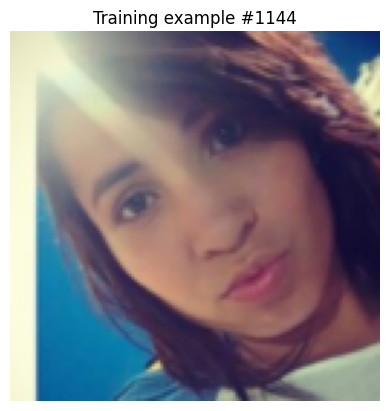

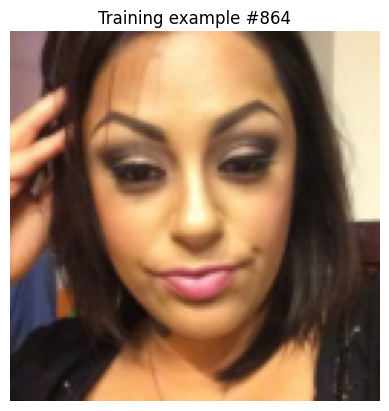

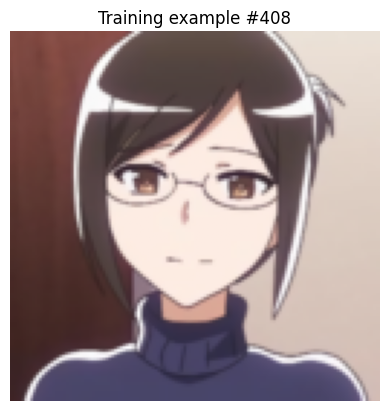

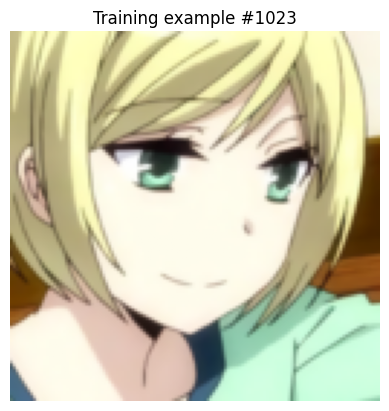

In [16]:
# Visualize a couple of images from the anime and face datasets
def visualize_samples(dataset, num_samples):
    for _ in range(num_samples):
        random_seg_img = random.randint(0, len(dataset))
        img, _ = dataset[random_seg_img]
        plt.imshow(img.permute(1, 2, 0))
        plt.title(f"Training example #{random_seg_img}")
        plt.axis('off')
        plt.show()
visualize_samples(realFacesTrain, 2)
visualize_samples(animeFacesTrain, 2)
